In [1]:
from sklearn.cluster import HDBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import numpy as np
import shutil
import seaborn as sns
from sklearn.manifold import TSNE
import pandas 
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
dataFile = open("SquaredWeightedMatrix_V2.pkl", 'rb')
df = pickle.load(dataFile)
sentences = df['sentence'].to_numpy()
df = df.drop('sentence', axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.010662,-0.035473,-0.025611,0.012773,0.012705,-0.013702,-0.044721,-0.014689,0.008079,-0.019715,...,0.000213,0.007823,0.009612,-0.000590,0.053429,-0.004752,0.020467,-0.002624,-0.002532,0.004103
1,0.032876,-0.064865,0.002555,-0.024485,-0.038841,-0.059541,-0.050490,-0.019825,0.020571,0.081838,...,-0.081816,-0.052465,-0.076624,0.079542,-0.027362,0.025651,0.030915,-0.055276,-0.012482,-0.054227
2,-0.012443,-0.043223,0.003684,0.061463,0.061439,-0.020868,-0.003319,0.026243,0.000578,0.015451,...,-0.050059,-0.019349,0.005958,-0.031995,0.003124,-0.018602,0.051105,-0.035655,-0.003563,0.010372
3,-0.010030,-0.037978,-0.011218,0.008807,-0.021877,0.023408,-0.046795,-0.021728,0.020444,0.041620,...,-0.036526,-0.008280,-0.061070,0.056864,0.017233,0.017288,-0.024562,-0.033899,0.006795,-0.014894
4,-0.012179,-0.042267,-0.005794,-0.008853,0.028347,0.017203,0.012331,-0.025404,-0.001078,0.013851,...,-0.037676,-0.006599,-0.029074,0.009095,0.009272,0.006182,0.036618,-0.062798,0.040195,-0.012385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328174,0.026335,0.020373,0.014832,-0.034999,-0.063762,0.050719,-0.014787,-0.045425,0.006275,0.061068,...,-0.122978,0.027188,-0.071143,0.035290,0.036733,-0.004520,-0.076438,0.007928,0.011149,0.002426
2328175,-0.025625,-0.002937,0.047254,-0.018320,-0.026607,0.047867,0.075852,-0.009191,0.034472,-0.009027,...,-0.040321,-0.032845,0.000307,0.035450,-0.041924,-0.019874,0.047281,-0.051015,0.019052,0.014368
2328176,0.083419,0.107829,0.048048,-0.006419,0.012844,0.000735,0.047308,-0.020474,-0.059422,-0.040704,...,0.037175,-0.079425,-0.052241,0.014160,-0.038610,0.025602,0.034606,-0.122390,0.032792,-0.012604
2328177,0.049879,-0.024188,-0.006114,0.106212,-0.125119,0.037542,-0.021974,0.033815,0.054945,0.047913,...,-0.031136,-0.074802,0.004342,-0.007249,-0.028693,0.123375,0.053106,-0.067641,0.000954,-0.058904


In [3]:
sentences

array(['the gentleman i spoke with at lindbergh twr over the phone was very polite and seemed to be primarily concerned with the sudden surprise of my presence in his ata',
       '""approx 5 mi nw of the mission bay vor", while at an alt of approx 500\' over san, i proceeded to contact san apch ctl on the freq depicted on my current san tca chart',
       'w/o hesitation i quickly changed freqs to find the same routine with this next ctlr',
       ...,
       'on the digital atis," they need to clearly tell crews which approach to expect',
       '""multiple aircraft have landed over multiple years on 122.95 which is an fbo frequency on the field',
       'it is listed on the sectional as the first frequency'],
      dtype=object)

In [4]:
matrix = df.head(30000).to_numpy()

In [4]:
tsne = TSNE(n_components=2, perplexity=20, n_jobs=-1, verbose=1)
data_2d = tsne.fit_transform(matrix)

In [ ]:
clustering = HDBSCAN(min_cluster_size=4, n_jobs=-1, min_samples=4).fit(data_2d)

In [5]:
labels = np.ndarray.tolist(clustering.labels_)
for i in np.unique(labels):
    print(str(i) + ": "+ str(labels.count(i)))

-1: 87
0: 6
1: 7
2: 10
3: 7
4: 5
5: 14
6: 4
7: 6
8: 4
9: 17
10: 5
11: 9
12: 6
13: 12
14: 5
15: 6
16: 11
17: 4
18: 18
19: 21
20: 16
21: 5
22: 5
23: 5
24: 5
25: 4
26: 5
27: 18
28: 19
29: 4
30: 4
31: 12
32: 15
33: 7
34: 11
35: 5
36: 12
37: 9
38: 13
39: 12
40: 6
41: 5
42: 29
43: 10


In [46]:
# silhouette_score(matrix, clustering.labels_)

-0.26883756010076576

In [12]:
for index,value in enumerate(labels):
    if value == 44:
        print(sentences[index] + '\n')

also", i determined that due to our close prox to the area that we needed to start a des rather quickly

since the flt was late in the evening and the winds had been high all day, i feel we could have been given more advanced warning of the first xing restriction

i have seldom experienced such high tailwinds in flt," so perhaps i could have told center we wanted to start down early or perhaps tell them we would have a prob getting to the xing alt

however", in retrospect, had i not descended mlt x this would never have happened

as i apched the rwy the situation began to take shape in my mind



In [78]:
def save_clusters(labels, sentences): 
    
    for index,value in enumerate(labels):
        filename = "./HDBSCAN_Clusters/Cluster" + str(value) + ".txt"
        out = open(filename, 'a')
        out.write(sentences[index] + '\n\n')
        out.close()

In [79]:
try:
    os.mkdir('HDBSCAN_Clusters')
except:
    shutil.rmtree('./HDBSCAN_Clusters')
    os.mkdir('HDBSCAN_Clusters')
save_clusters(labels, sentences)

In [6]:
# plt.rcParams['axes.facecolor'] = (0.78, 0.95, 0.61)
plt.rcParams['axes.facecolor'] = (0, 0, 0)
plt.rcParams['axes.grid'] = False

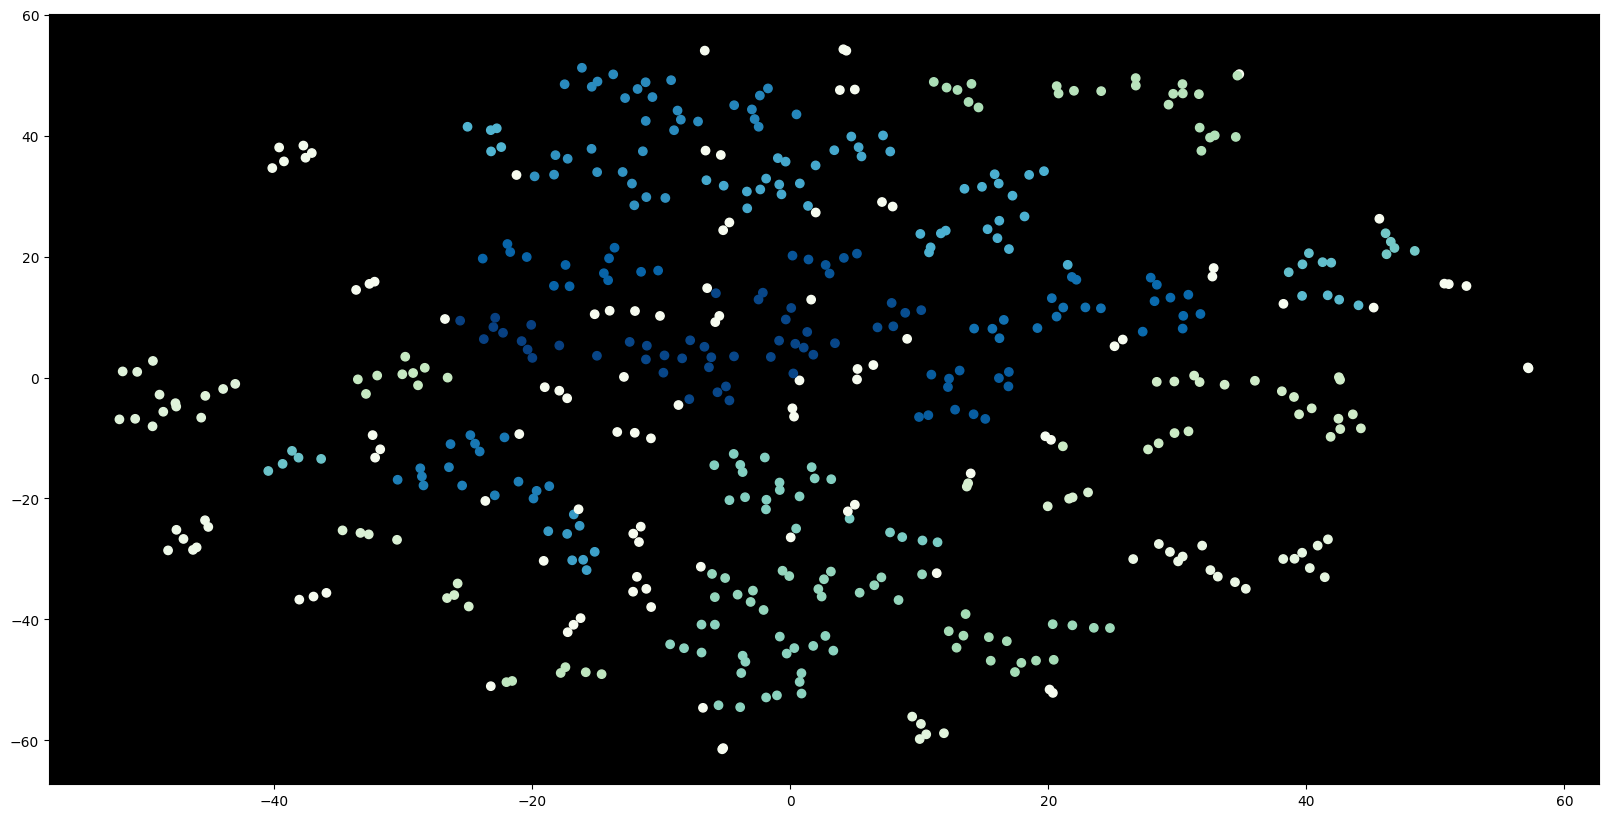

In [7]:
data_2d = data_2d.tolist()
for i in range(len(data_2d)):
    data_2d[i].append(labels[i])
data_2d = np.array(data_2d)
plt.figure(figsize=(20, 10))
plt.scatter(data_2d[:,0], data_2d[:,1], c=data_2d[:,2], cmap='GnBu')
plt.savefig('HDBSCAN.png')
plt.show()